# Modelos de velocidades sinteticos 2D a formato Numpy

In [1]:
import numpy as np
import segyio
from scipy.io import loadmat
import matplotlib.pyplot as plt
import scooby

___
## Modelo BP 2004 Exact

### Descripción del modelo
Coordenadas
- East - West $\to 67.425 \space km$
- Depth $\to 11.9375 \space km$

Intervalos de la malla
- East - West $\to 12.5 \space m$
- Depth $\to 6.25 \space m$

Tamano de la malla
- $X \to 5395$
- $Z \to 1911$


### Lectura del archivo SEG-Y

In [9]:
with segyio.open('bp/vel_z6.25m_x12.5m_exact.segy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

c:\Users\inten\Miniconda3\envs\main1\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [10]:
vel.shape

(5395, 1911)

In [11]:
vel = vel.T
vel.shape

(1911, 5395)

### Se exporta en formato Numpy

In [21]:
np.save(arr=vel, file='bp/vel_z6.25m_x12.5m_exact.npy')

### Visualización del modelo

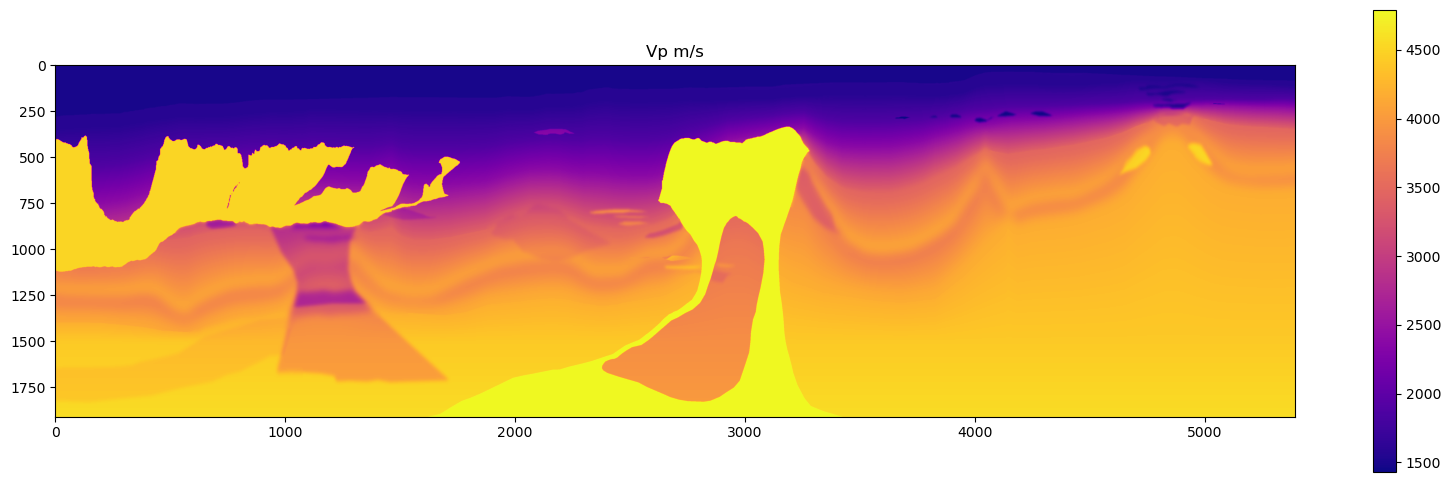

In [12]:
fig = plt.figure(figsize=(20, 12))

plt.imshow(vel, cmap='plasma', aspect=.8)
plt.colorbar(shrink=.5)
plt.title('Vp m/s')
plt.show()

___
## Modelo Marmousi2 (Vp)

### Descripción del modelo
Coordenadas
- East - West $\to 17 \space km$
- Depth $\to 3.5 \space km$

Intervalos de la malla
- East - West $\to 6.25 \space m$
- Depth $\to 5.0 \space m$

Tamano de la malla
- $X \to 2721$
- $Z \to 701$

### Lectura del archivo MAT

In [2]:
f = loadmat('marmousi2/MarmousiModel2 little.mat')

In [3]:
sorted(f.keys())

['Density',
 'IP',
 'IS',
 'Vp',
 'Vs',
 '__globals__',
 '__header__',
 '__version__',
 'seismic',
 'wavelet']

In [4]:
vel = f['Vp']

In [5]:
vel.shape

(701, 2721)

### Se exporta en formato Numpy

In [27]:
np.save(arr=vel, file='marmousi2/MarmousiModel2_little.npy')

### Visualización del modelo

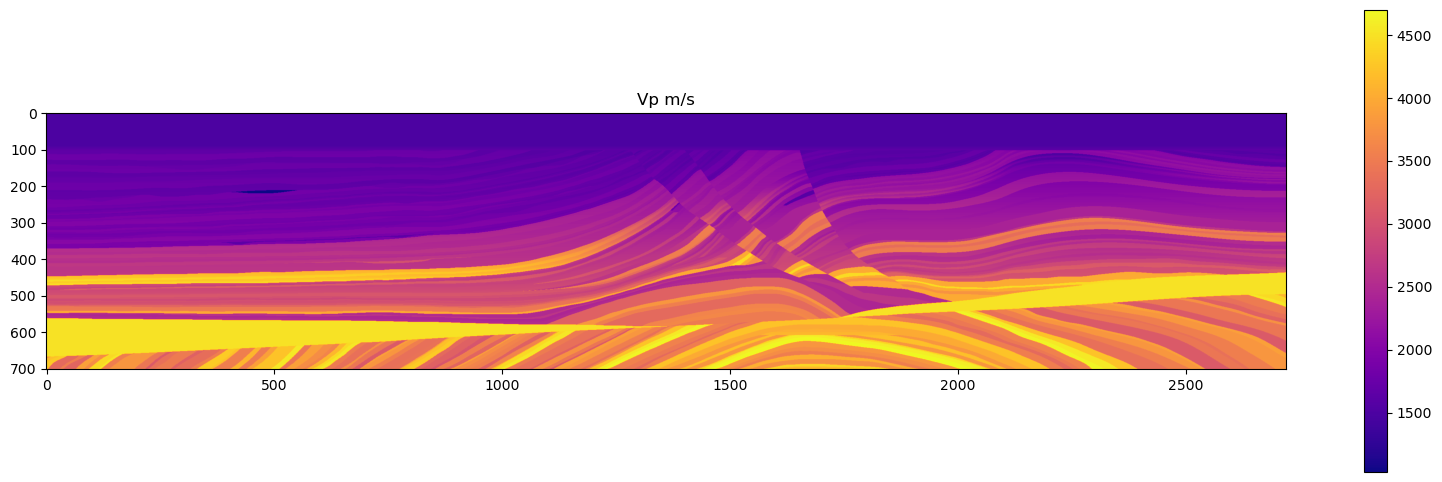

In [8]:
fig = plt.figure(figsize=(20, 12))

plt.imshow(vel, cmap='plasma', aspect=.8)
plt.colorbar(shrink=.5)
plt.title('Vp m/s')
plt.show()

___
## Modelo SEAM N23900 (Vp)

### Descripción del modelo
Coordenadas
- East - West $\to 35 \space km$
- Depth $\to 15 \space km$

Intervalos de la malla
- East - West $\to 20.0 \space m$
- Depth $\to 10.0 \space m$

Tamano de la malla
- $X \to 1751$
- $Z \to 1501$

### Lectura del archivo SEG-Y

In [17]:
with segyio.open('seam/SEAM_Vp_Elastic_N23900.sgy', strict=False) as s:
    vel = np.stack(t.astype(float) for t in s.trace)

In [14]:
vel.shape

(1751, 1501)

In [19]:
vel = vel.T
vel.shape

(1501, 1751)

### Se exporta en formato Numpy

In [34]:
np.save(arr=vel, file='seam/SEAM_Vp_Elastic_N23900.npy')

### Visualización del modelo

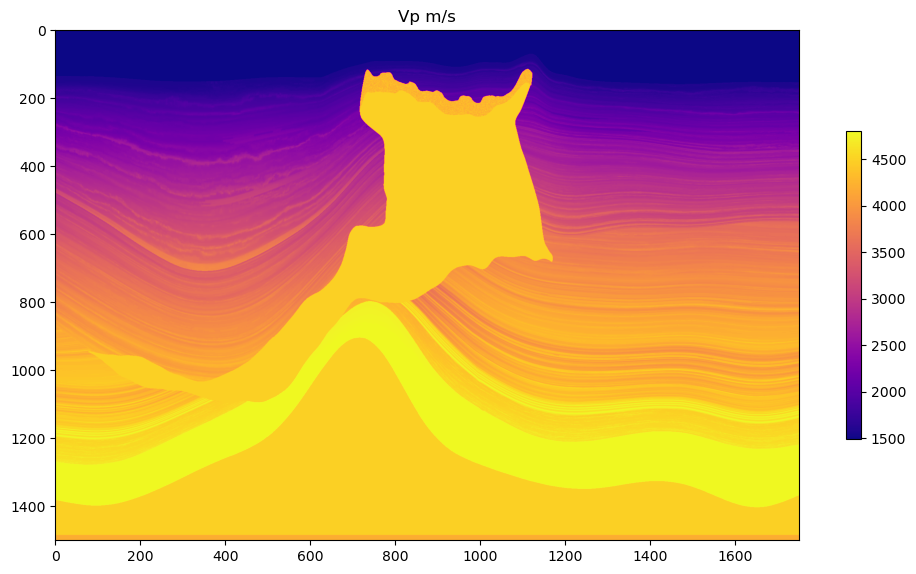

In [20]:
fig = plt.figure(figsize=(12, 8))

plt.imshow(vel, cmap='plasma', aspect=.8)
plt.colorbar(shrink=.5)
plt.title('Vp m/s')
plt.show()

## Recursos computacionales

In [2]:
scooby.Report()

--------------------------------------------------------------------------------
  Date: Wed Nov 30 13:58:13 2022 Hora estándar central (México)

                OS : Windows
            CPU(s) : 4
           Machine : AMD64
      Architecture : 64bit
               RAM : 7.9 GiB
       Environment : Jupyter

  Python 3.10.6 | packaged by conda-forge | (main, Oct 24 2022, 16:02:16) [MSC
  v.1916 64 bit (AMD64)]

             numpy : 1.23.5
             scipy : 1.9.3
           IPython : 8.4.0
        matplotlib : 3.6.2
            scooby : 0.7.0

  Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904
  for Intel(R) 64 architecture applications
--------------------------------------------------------------------------------